In [26]:
# Nerigleston da Silva Costa Filho
# Lista de Exercícios
# ADS P3

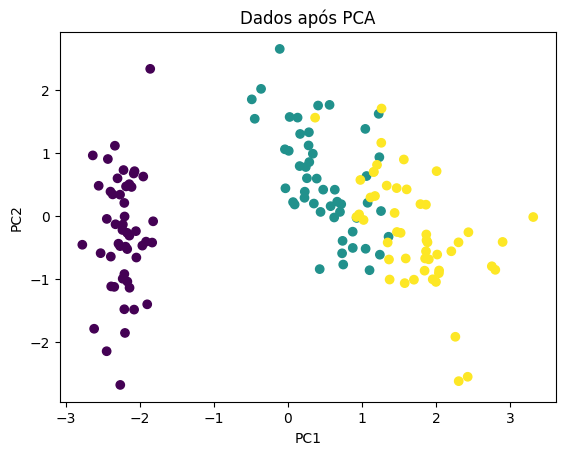

In [11]:
# Questão 1

import numpy as np
import matplotlib.pyplot as plt

def standardize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def pca(X, n_components=2):
    X_std = standardize_data(X)
    cov_matrix = np.cov(X_std.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    X_pca = X_std.dot(eigenvectors[:, :n_components])

    return X_pca, eigenvalues, eigenvectors

from sklearn.datasets import load_iris
data = load_iris()
X = data.data

X_pca, eigenvalues, eigenvectors = pca(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dados após PCA')
plt.show()



Variância explicada por cada componente: [0.92461872 0.05306648]


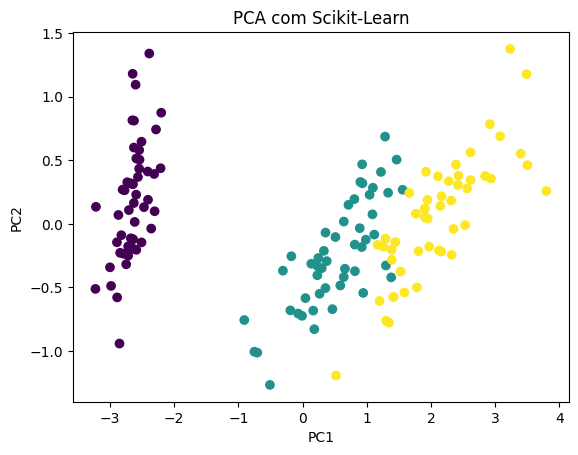

In [12]:
# Questão 2

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Variância explicada por cada componente: {pca.explained_variance_ratio_}")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA com Scikit-Learn')
plt.show()


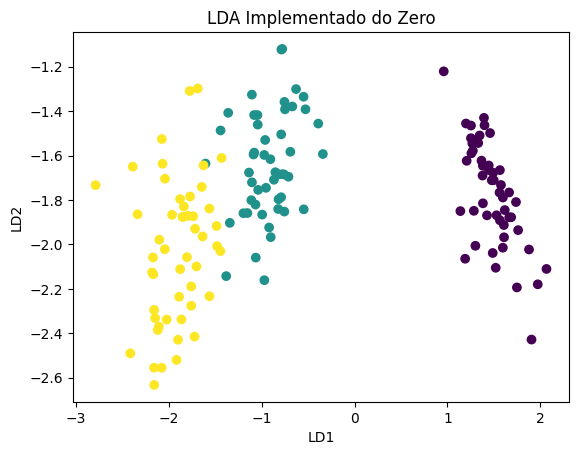

In [13]:
# Questão 3

import numpy as np

def lda(X, y, n_components=2):
    mean_vectors = []
    for cl in np.unique(y):
        mean_vectors.append(np.mean(X[y == cl], axis=0))

    S_W = np.zeros((X.shape[1], X.shape[1]))
    for cl, mv in zip(np.unique(y), mean_vectors):
        class_scatter = np.cov(X[y == cl].T)
        S_W += class_scatter

    overall_mean = np.mean(X, axis=0)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == i+1, :].shape[0]
        mean_vec = mean_vec.reshape(X.shape[1], 1)
        overall_mean = overall_mean.reshape(X.shape[1], 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    W = np.hstack([eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(n_components)])

    return X.dot(W)

from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

X_lda = lda(X, y)

import matplotlib.pyplot as plt
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Implementado do Zero')
plt.show()


Precisão do LDA: 0.98


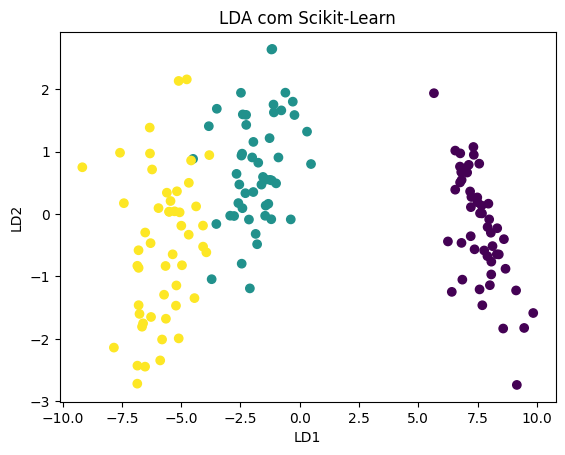

In [14]:
# Questão 4

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

accuracy = lda.score(X, y)
print(f"Precisão do LDA: {accuracy}")

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA com Scikit-Learn')
plt.show()


In [15]:
import numpy as np

def pearson_similarity(user_ratings, target_user_ratings):
    mask = np.isfinite(user_ratings) & np.isfinite(target_user_ratings)
    if np.sum(mask) < 2:
        return 0
    return np.corrcoef(user_ratings[mask], target_user_ratings[mask])[0, 1]

def collaborative_filtering(user_ratings_matrix, target_user, k=5):
    target_user_ratings = user_ratings_matrix[target_user, :]
    similarities = [pearson_similarity(user_ratings_matrix[i], target_user_ratings) for i in range(len(user_ratings_matrix))]

    similar_users = np.argsort(similarities)[-k:]

    predictions = np.nanmean(user_ratings_matrix[similar_users, :], axis=0)

    return predictions

user_ratings_matrix = np.array([[4, np.nan, np.nan, 5, 1],
                                [5, 5, 4, 4, np.nan],
                                [np.nan, 4, 4, 2, np.nan],
                                [3, np.nan, 4, np.nan, 5],
                                [np.nan, 4, np.nan, 3, 3]])

recommendations = collaborative_filtering(user_ratings_matrix, target_user=0)
print(f"Recomendações para o usuário 0: {recommendations}")


Recomendações para o usuário 0: [4.         4.33333333 4.         3.5        3.        ]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
# Questão 6

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

data = {'Produto': ['Produto A', 'Produto B', 'Produto C'],
        'Característica 1': [1, 0, 1],
        'Característica 2': [0, 1, 1],
        'Característica 3': [1, 1, 0]}

df = pd.DataFrame(data)

similaridade = cosine_similarity(df.drop('Produto', axis=1))

def recomendar(produto_id, similaridade_matrix, produtos, top_n=2):
    similar_produtos = list(enumerate(similaridade_matrix[produto_id]))
    similar_produtos = sorted(similar_produtos, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recomendados = [produtos[i[0]] for i in similar_produtos]
    return recomendados

produto_id = 0
produtos = df['Produto']
recomendados = recomendar(produto_id, similaridade, produtos)
print(f"Produtos recomendados para {produtos[produto_id]}: {recomendados}")


Produtos recomendados para Produto A: ['Produto B', 'Produto C']


In [17]:
# Questão 7

!pip install tpot

from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

y_pred = tpot.predict(X_test)
print(f"Precisão do TPOT: {accuracy_score(y_test, y_pred)}")

tpot.export('tpot_pipeline.py')


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.0 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=ab51f1bbe459dcf744aae27ca198eb5478ad261a287f80ed4003d785a15bd544
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9714285714285713

Generation 2 - Current best internal CV score: 0.9714285714285713

Generation 3 - Current best internal CV score: 0.9714285714285713

Generation 4 - Current best internal CV score: 0.9714285714285713

Generation 5 - Current best internal CV score: 0.9714285714285713

Best pipeline: LogisticRegression(input_matrix, C=0.5, dual=False, penalty=l2)
Precisão do TPOT: 0.9555555555555556


In [18]:
# Questão 8

from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

print(f"Precisão do modelo otimizado: {tpot.score(X_test, y_test)}")

tpot.export('melhor_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9904761904761905

Generation 2 - Current best internal CV score: 0.9904761904761905

Generation 3 - Current best internal CV score: 0.9904761904761905

Generation 4 - Current best internal CV score: 0.9904761904761905

Generation 5 - Current best internal CV score: 0.9904761904761905

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.1)
Precisão do modelo otimizado: 0.9333333333333333


In [19]:
# Questão 9

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Bagging:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            model = self.base_estimator()
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.round(np.mean(predictions, axis=0))

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

bagging = Bagging(DecisionTreeClassifier, n_estimators=10)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print(f"Precisão do Bagging: {accuracy_score(y_test, y_pred)}")


Precisão do Bagging: 0.8888888888888888


In [20]:
# Questão 10

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Precisão do Random Forest: {accuracy_score(y_test, y_pred)}")

importances = rf.feature_importances_
print(f"Importância das características: {importances}")


Precisão do Random Forest: 0.9555555555555556
Importância das características: [0.09714509 0.03354729 0.4229238  0.44638382]


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)
print(f"Precisão do AdaBoost: {accuracy_score(y_test, y_pred)}")

Precisão do AdaBoost: 0.9333333333333333


In [22]:
# Questão 12

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

bagging = BaggingClassifier(n_estimators=10)
random_forest = RandomForestClassifier(n_estimators=100)
boosting = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')

models = [bagging, random_forest, boosting]
model_names = ['Bagging', 'Random Forest', 'Boosting']
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name}: Média da precisão = {np.mean(scores)}')


Bagging: Média da precisão = 0.9533333333333334
Random Forest: Média da precisão = 0.9666666666666668
Boosting: Média da precisão = 0.9533333333333334


Variância Explicada por Componente (PCA): [0.55183421 0.26762724]


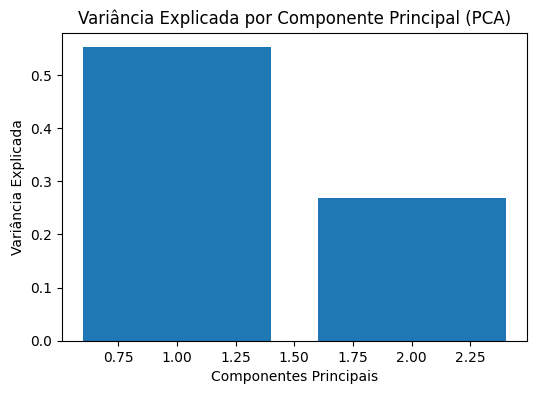


Componentes Principais (PCA):
   Feature 1  Feature 2  Feature 3  Feature 4
0   0.599570  -0.351674   0.658331  -0.288863
1   0.434956   0.550558   0.198267   0.684390


In [23]:
# Questão 13

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = make_classification(n_samples=300, n_features=4, n_informative=3,
                           n_redundant=1, n_classes=3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variância Explicada por Componente (PCA):", pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente Principal (PCA)')
plt.show()

componentes_principais = pca.components_

print("\nComponentes Principais (PCA):")
print(pd.DataFrame(componentes_principais, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']))

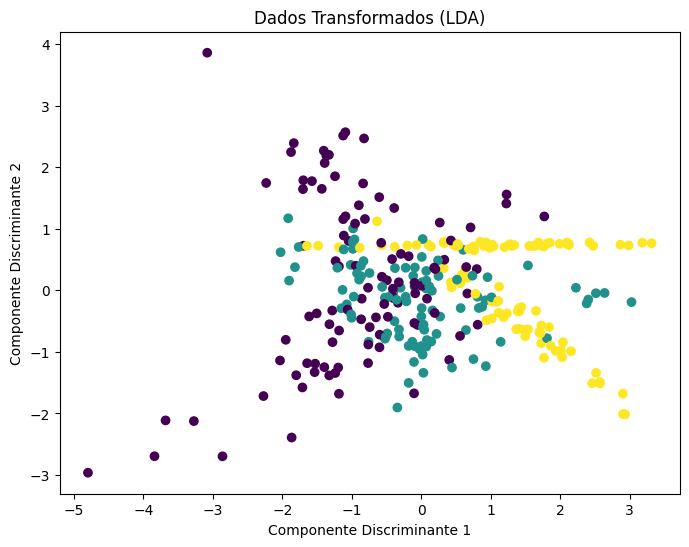


Coeficientes LDA:
   Feature 1  Feature 2  Feature 3  Feature 4
0   0.257846   0.949781   0.169879  -0.285285
1   0.053406   0.002627   0.025388   0.131017
2  -0.366114  -1.113490  -0.229342   0.174806


In [24]:
# Questão 14

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=300, n_features=4, n_informative=3,
                           n_redundant=1, n_classes=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_lda = lda.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')
plt.title('Dados Transformados (LDA)')
plt.show()

coeficientes_lda = lda.coef_

print("\nCoeficientes LDA:")
print(pd.DataFrame(coeficientes_lda, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']))


In [25]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=300, n_features=4, n_informative=3,
                           n_redundant=1, n_classes=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(random_state=42))
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5)

print("Acurácia do Pipeline (Validação Cruzada):", scores.mean())
print("Desvio Padrão:", scores.std())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Pipeline (Dados de Teste):", accuracy)

Acurácia do Pipeline (Validação Cruzada): 0.6833333333333333
Desvio Padrão: 0.03061862178478972
Acurácia do Pipeline (Dados de Teste): 0.5333333333333333
